# **Telco Customer Churn**

**Created by: Rizqi Rahmadani Zuhri Saputri**

**Table of content :**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation
5. Modeling
6. Conclusion and Recommendation
7. Deployment

****

## **1. Business Problem Understanding**

### **Context:**
A subscription business model is a recurring revenue model in which customers pay a weekly, monthly, or yearly fee in exchange for products or services. Customers can renew their subscription after a certain period of time. This business model really depend on recurring revenue, monthly recurring revenue (MRR) is the lifeblood of the subscription business. Without predictable sources of revenue, it’s impossible to sustain business over the long-term. On the flip side, it’s critical to track churned MRR to assess how customer attrition affects the revenue. If business losing customers too quickly, it can seriously hurt business ability to grow.


### **Problem Statement:**
Customer churn (or customer attrition) refers to the loss of customers or subscribers for any reason at all, businesses measure and track churn as a percentage of lost customers compared to total number of customers over a given time period. Based on the historical data, Telco has a relatively high rate of customer churn, almost 30%. If this continues, the company will keep losing recurring revenue and it will also affect the company's ability to grow. Additionally, the company will spend more funds to acquire new customers, because according to Harvard Business Review, converting a first-time customer is 5 to 25 times more expensive than keeping an existing one. A significant reduction in churn rate makes your business more profitable because you’re able to keep most subscribers within your customer base.

Problem: There haven't been any effective preventive strategies taken yet to prevent customers from leaving the company.

**Stakeholders** : Marketing Manager

### **Goals**
As data scientist we try to help the company in identifying warning signs of customer churn in order to `reduce the risk of losing recurring revenue by 80%`. With answering some questions:
   
    - What are the characteristics of customers who left the service?
    - How can the company predict the chances of customers churning?
    - What factors influence the chances of customers leaving the company?

This enables company to proactively implement targeted retention strategies, significantly lowering the chances of customers leaving and thus, effectively reducing future churn rates.



### **Analytical Approach:**

Here are the steps of analysis we will undertake:

* __Step-1:__ Perform Exploratory Data Analysis (EDA) to discover the behavior of customers who leave the company.
* __Step-2:__ Build a classification model based on behavioral analysis to predict the chances of customers leaving the company.
* __Step-3:__ Identify the factors that contribute to customers' chances of leaving the company.
* __Step-4:__ Develop a scheme/strategy simulated to reduce the chances of customers leaving the company (churn rate). 

The analysis results will be accessible to stakeholders through a dedicated platform (Web/Mobile) whenever targeted retention strategies are to be implemented. The workflow is as follows:

1. Stakeholders input customer data.
2. The system provides a list of customers with high potential to leave the company.
3. Stakeholders use the analysis results to implement targeted retention strategies.


### **Metric Evaluation:**

This analysis will focus on customers who have left the company. The targets are defined as follows:

- **0:** Indicates customers who did not leave the company.
- **1:** Indicates customers who left the company.

Ensuring the accuracy of the model is crucial to avoid the financial impact of classification errors (false positives or false negatives).

| **Error Type**     |**Explanation** | **Consequences** | 
|-----------------|------------|----------------|
| **False Positive / Type 1 Error**  | The model incorrectly predicts that the customer will leave the company, when in fact they will not | The bank will incur unnecessary marketing expenses by targeting loyal customers |
| **False Negative / Type 2 Error**  | This happens when the model incorrectly predicts that the customer will not leave the company when, in fact, they will | The bank will lose recurring revenue and spends more funds to acquire new customers| 

We will conduct simulations to get an overview of the consequences of each type of error using the following facts:
- Median of monthly charges around $70 per customer
- Average customer acquisition cost (CAC) for telecomunication industry is $694 [source](https://userpilot.com/blog/average-customer-acquisition-cost/)
- Retention cost for SaaS company 4-5 times smaller than CAC [source](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=2c41201c1c7d)

**Type 1 Error Simulation**

Retention Cost= ($694/4)= $173.5 per Customer

**Type 2 Error Simulation**

Recurring Revenue + Customer Acquisition Cost= ($70+ $694)= $764 per Customer

Note: This costs are an estimated result based on the average of the same industry, this value can be smaller or larger depending on other factors that influenced each company.


## **2. Data Understanding**

### **About the Dataset**
The dataset represents customer profiles who have left the telco company. A churn in telco and other subscription-based services means a situation when the customer leaves the service provider.

### **Data Attribute: Target & Features**

The main goal of this machine learning development is to classify customers who will leave the company or not.

| Target | Data Type | Description |
| --- | --- | --- |
| Churn | String | Whether the customer churns or not |

In machine learning, a feature refers to an individual measurable property or characteristic of a phenomenon being observed. Features are essentially variables or attributes that are used as inputs to a machine learning model to make predictions or decisions.

| Feature | Data Type | Description |
| --- | --- | --- |
| Dependents| String | Whether the customer has dependents or not |
| Tenure | Integer | How long customer using the services (customer lifetime) |
| OnlineSecurity | String | Whether the customer has online security or not |
| OnlineBackup | String | Whether the customer has online backup or not |
| InternetService | String | Whether the client is subscribed to Internet service |
| DeviceProtection | String | Whether the client has device protection or not |
| TechSupport | String | Whether the client has tech support or not |
| Contract | String | Type of contract according to duration |
| PaperlessBilling | String | Bills issued in paperless form |
| MonthlyCharges| Float | How much customer pay for services each month|



In [126]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import phik
from phik import resources, report
import warnings
warnings.filterwarnings('ignore')


alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [127]:
df= pd.read_csv('../data/data_telco_customer_churn.csv')

display(df.describe(), df.describe(include=['object']))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Total customers of Telco is 4930:

- Dependents: 70% customers didn't have dependents
- Online Security: 50% customers didn't have online security
- Online Backup: 44% customers did't have online backup
- Internet Service: 44% customers have fiber optic as internet service
- Device Protection: 44% customers didn't have device protection
- Tech Support: 50% customers did't have tech support
- Contract: 55% customers choose Month-to-month as contract type
- Billing: 60% customers choose paperless form for billing
- Tenure: The median time of customers using the services is 29 Months
- Monthly Charges: The median value of monthly charges is $70
- Churn: 27% of customers churns

### **Data Condition: Quality and Representativeness**

Data quality and representativeness are critical aspects in machine learning because they directly impact the performance and reliability of the models trained on the data

In [128]:
#Dataset Information
print(f'Sum of row and columns: {df.shape}')

pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

Sum of row and columns: (4930, 11)


,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[Yes, No]"
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


**From this table we know that**
- All data are present and available, no null value found.
- The uniformity and coherence of data is good, consistent typography.
- Features online security, online backup, device protection, and tech support need internet service to be available

## **3. Exploratory Data Analysis**


##### **Normality Assesment**
- From graphical method using histogram and frequentist test using Saphiro the distribution data of Tenure and Monthly Charges are not normal.

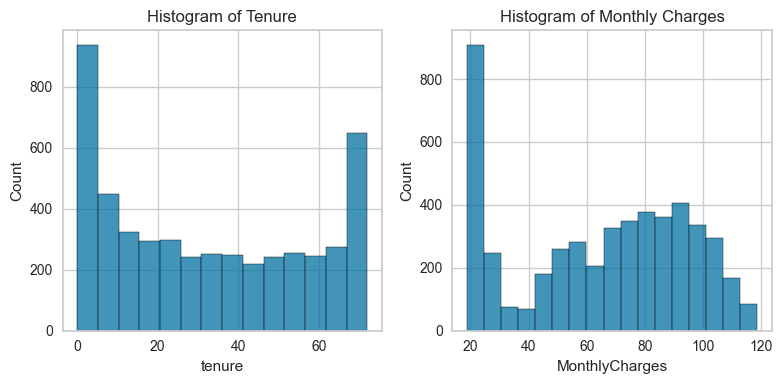

In [129]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create boxplot for 'tenure'
sns.histplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Histogram of Tenure')

# Create boxplot for 'MonthlyCharges'
sns.histplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Histogram of Monthly Charges')

plt.tight_layout()
plt.show()


In [130]:
df_num= df.select_dtypes(include='number')

def test_normality(df, alpha=0.05):
    # Create an empty DataFrame to hold the results
    result_df = pd.DataFrame(index=df.columns, columns=["Normality Test Result"])
    
    # Perform Shapiro-Wilk test for each column
    for column in df.columns:
        data = df[column]
        stat, p = shapiro(data)
        if p > alpha:
            result = "Normal"
        else:
            result = "Not Normal"
        result_df.loc[column, "Normality Test Result"] = result
    
    return result_df

# Example usage:
# Assuming 'my_dataframe' is your DataFrame containing your data
result_df = test_normality(df_num).reset_index()
result_df

,index,Normality Test Result
0,tenure,Not Normal
1,MonthlyCharges,Not Normal


##### **Correlation Assesment**
- Numerical features have low correlation with each other
- The correlation among categorical features appears to be very high in features like online security, online backup, internet service, device protection, and tech support `hal ini dapat menjadi potensi adanya colinearity pada model yang dibangun`. These features also have medium correlation with the contract type, whereas the correlation with dependents and paperless billing is very low.
- The correlation between features and the target mostly has low magnitude, with only one feature can be considered as medium magnitude, which is tenure with a negative correlation direction.

In [131]:
from sklearn.preprocessing import LabelEncoder
df_corr= df.copy()
df_corr['churn_encoded']= LabelEncoder().fit_transform(df['Churn'])

In [132]:
df_corr.select_dtypes(include='number').corr('spearman').style.background_gradient(cmap='YlOrRd')

,tenure,MonthlyCharges,churn_encoded
tenure,1.000000,0.265964,-0.377811
MonthlyCharges,0.265964,1.000000,0.184612
churn_encoded,-0.377811,0.184612,1.000000


In [133]:
df_corr.select_dtypes(include='object').phik_matrix().style.background_gradient(cmap='YlOrRd')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
Dependents,1.000000,0.111586,0.086239,0.107844,0.083325,0.102492,0.147841,0.168718,0.263869
OnlineSecurity,0.111586,1.000000,0.947036,0.949761,0.946561,0.952145,0.630316,0.209820,0.209128
OnlineBackup,0.086239,0.947036,1.000000,0.942894,0.948154,0.947837,0.576490,0.194131,0.182379
InternetService,0.107844,0.949761,0.942894,1.000000,0.942801,0.949225,0.507184,0.230172,0.196474
DeviceProtection,0.083325,0.946561,0.948154,0.942801,1.000000,0.950512,0.627447,0.194845,0.166714
TechSupport,0.102492,0.952145,0.947837,0.949225,0.950512,1.000000,0.665337,0.200426,0.204940
Contract,0.147841,0.630316,0.576490,0.507184,0.627447,0.665337,1.000000,0.105672,0.257979
PaperlessBilling,0.168718,0.209820,0.194131,0.230172,0.194845,0.200426,0.105672,1.000000,0.290668
Churn,0.263869,0.209128,0.182379,0.196474,0.166714,0.204940,0.257979,0.290668,1.000000


## **4. Data Preparation**

#### **Duplicated Value**

In [134]:
# Check duplicated value
df.duplicated().sum()

77

In [135]:
# Drop duplicated
df.drop_duplicates(inplace= True)

#### **Outlier Data**

- The tenure and monthly charges features don't have outlier data

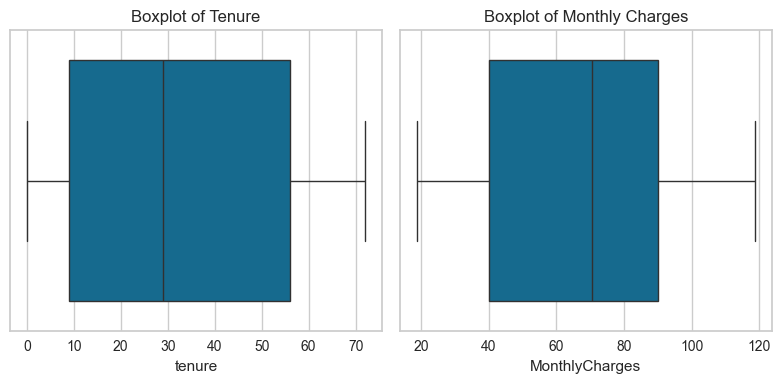

In [136]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create boxplot for 'tenure'
sns.boxplot(x=df['tenure'], ax=axes[0])
axes[0].set_title('Boxplot of Tenure')

# Create boxplot for 'MonthlyCharges'
sns.boxplot(x=df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('Boxplot of Monthly Charges')

plt.tight_layout()
plt.show()


In [137]:
columns_of_interest = ['tenure', 'MonthlyCharges']
outlier_info = {}

for column in columns_of_interest:
    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame to extract outlier data
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Summarize the outlier data
    outlier_sum = outliers[column].count()
    
    # Store the outlier sum in the dictionary
    outlier_info[column] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Total Outlier': outlier_sum}

# Step 4: Convert the dictionary to a DataFrame for table format
outlier_table = pd.DataFrame(outlier_info).transpose()

outlier_table['Percentage']= round(outlier_table['Total Outlier']/df['Dependents'].count()*100,2)
outlier_table

,Lower Bound,Upper Bound,Total Outlier,Percentage
tenure,-61.50,126.50,0.0,0.0
MonthlyCharges,-34.95,165.05,0.0,0.0


#### **Data Types and Cardinality**


- 8 out of 10 features are categorical data type, which must be encoded
- The categorical data types have only 2-3 unique labels which can be categorized as **low cardinality**

In [138]:
pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

,Name,Type,N/A (%),Unique,Sample
0,Dependents,object,0.0,2,"[Yes, No]"
1,tenure,int64,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


**Target**
| Target | Data Type | Handling |
| --- | --- | --- |
| Churn | Nominal | Encode |

**Numeric Feature**

| Feature | Data Type | Handling |
| --- | --- | --- |
| Tenure | Discrete | - |
| MonthlyCharges | Continues | -|

**Categorical Feature**

| Feature | Data Type | Handling |
| --- | --- | --- |
| Dependents| Nominal | One Hot Encoding |
| OnlineSecurity | Nominal | Leave one out Encoding |
| OnlineBackup	| Nominal | Leave one out Encoding |
| InternetService | Nominal | Leave one out Encoding |
| DeviceProtection | Nominal | Leave one out Encoding |
| TechSupport | Nominal | Leave one out Encoding |
| Contract | Nominal | Leave one out Encoding |
| PaperlessBilling | Nominal | One Hot Encoding|


#### **Rare Label**

- From all categorical features the frequency of occurrence for each label is quite common and does not tend towards rare labels.

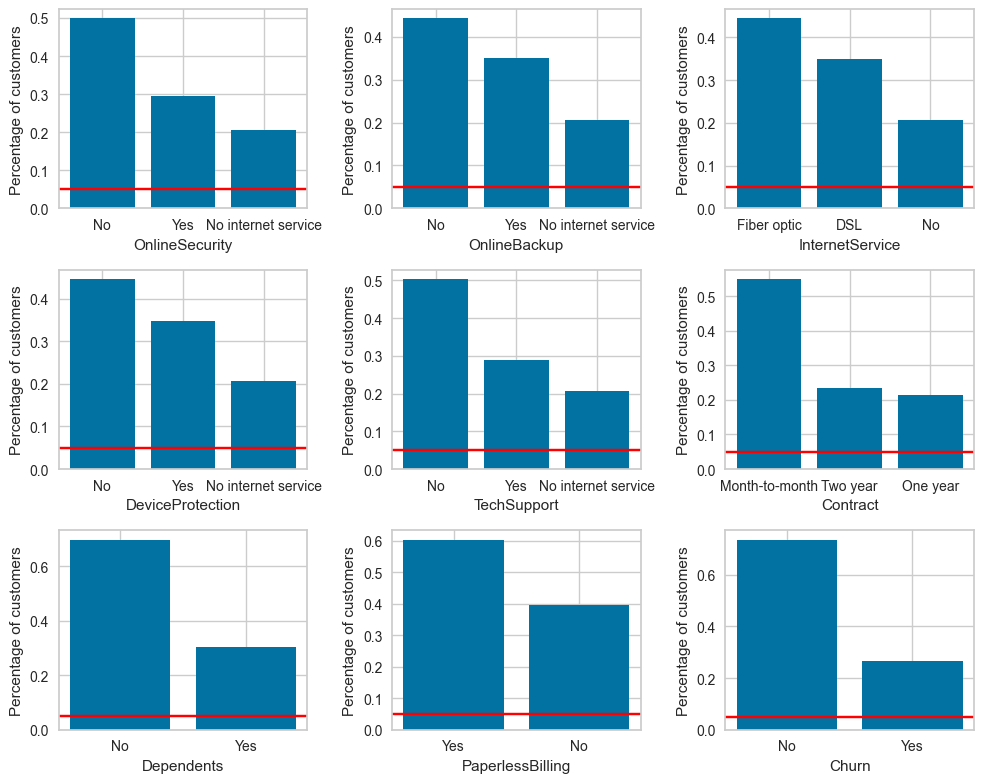

In [139]:
# Total customers
total_customers= len(df)
cat_cols = ["OnlineSecurity", "OnlineBackup", "InternetService", "DeviceProtection", "TechSupport", "Contract", "Dependents", "PaperlessBilling", "Churn"]

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3

# Calculate the total number of plots
total_plots = num_rows * num_cols

# Create a new figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Initialize a counter for the plots
plot_counter = 0

# Loop through each categorical variable
for col in cat_cols:
    # Calculate the percentage of houses per category
    temp_df = pd.Series(df[col].value_counts() / total_customers)

    # Sort the values in descending order
    temp_df = temp_df.sort_values(ascending=False)

    # Determine the position of the current plot in the subplot grid
    row_index = plot_counter // num_cols
    col_index = plot_counter % num_cols

    # Plot the data in the appropriate subplot
    axs[row_index, col_index].bar(temp_df.index, temp_df)
    axs[row_index, col_index].set_xlabel(col)
    axs[row_index, col_index].set_ylabel('Percentage of customers')

    # Add a red line at the threshold for rare categories (5%)
    axs[row_index, col_index].axhline(y=0.05, color='red')

    # Increment the plot counter
    plot_counter += 1

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plots
plt.show()


#### **Data Preprocessing**

In [140]:
#!pip3 install pycaret

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from pycaret.internal.preprocess.transformers import TransformerWrapper
from sklearn.metrics import fbeta_score
from imblearn.over_sampling import SMOTE
from pycaret.internal.preprocess.transformers import FixImbalancer

In [142]:
RANDOM_STATE = 42

# Encode Target
df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)

# Split dataset
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE, stratify=df['Churn'])

In [143]:
# Data prepocessor pipeline
pipeline_1= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling','OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=OneHotEncoder(drop='first'))),
]

In [144]:
# Data prepocessor pipeline
pipeline_2= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
]

In [145]:
# Data prepocessor pipeline
pipeline_3= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
    ("scaler", TransformerWrapper(
        include=['tenure','MonthlyCharges'], 
        transformer=RobustScaler())),
]

In [146]:
# Data prepocessor pipeline
pipeline_3= [
    ("onehot", TransformerWrapper(
        include=['Dependents', 'PaperlessBilling'], 
        transformer=OneHotEncoder(drop='first'))),
    ("binary", TransformerWrapper(
        include=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection', 'TechSupport', 'Contract'], 
        transformer=BinaryEncoder())),
    ("scaler", TransformerWrapper(
        include=['tenure','MonthlyCharges'], 
        transformer=RobustScaler())),
]

In [147]:
from pycaret.classification import *

# Setup awal experimen
# Define configuration parameters
configs = {
    'data': df_seen, 
    'target': 'Churn', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': None,
    'session_id': RANDOM_STATE, 
    'fold': 5,
}

setup(**configs)

## **5. Model Experiment**

#### **Data Prepocessing Experiment**

- Using Onehot Encoder to encode all categorical feature

In [217]:
onehot = ClassificationExperiment()
onehot.setup(**configs,custom_pipeline= pipeline_1)
onehot.add_metric('F2','F2', fbeta_score, beta=2)

# Tampilkan pipeline
onehot.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse='deprecated',
                                                                                             sparse_output=True))))],
         verbose=False)

In [218]:
onehot.compare_models(sort='F2', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.6696,0.8179,0.8592,0.4377,0.5798,0.3520,0.4070,0.7203,0.0540
svm,SVM - Linear Kernel,0.7156,0.0000,0.6714,0.5380,0.5500,0.3632,0.4032,0.6045,0.0560
lda,Linear Discriminant Analysis,0.7945,0.8346,0.5485,0.6290,0.5855,0.4499,0.4521,0.5627,0.0500
lightgbm,Light Gradient Boosting Machine,0.7874,0.8256,0.5279,0.6161,0.5680,0.4283,0.4309,0.5431,0.0540
lr,Logistic Regression,0.7945,0.8375,0.5157,0.6397,0.5703,0.4375,0.4423,0.5361,0.0820
gbc,Gradient Boosting Classifier,0.7929,0.8379,0.5109,0.6389,0.5665,0.4329,0.4383,0.5316,0.0600
ada,Ada Boost Classifier,0.7948,0.8369,0.4963,0.6475,0.5616,0.4309,0.4375,0.5205,0.0740
knn,K Neighbors Classifier,0.7665,0.7701,0.5084,0.5663,0.5350,0.3800,0.3814,0.5186,0.0580
ridge,Ridge Classifier,0.7942,0.0000,0.4793,0.6528,0.5519,0.4227,0.4316,0.5058,0.0460
qda,Quadratic Discriminant Analysis,0.4351,0.5208,0.7031,0.3092,0.3547,0.0322,0.0442,0.4962,0.0500


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

- Using Onehot Encoder  and Binary Encoder to encode categorical feature

In [150]:
onebin = ClassificationExperiment()
onebin.setup(**configs,custom_pipeline= pipeline_2)
onebin.add_metric('F2','F2', fbeta_score, beta=2)

# Tampilkan pipeline
onebin.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',...
                                                                                                      {'col': 'InternetService',
                                                                                                       'mapping':     InternetService_0  InternetService_1
 1                  0                  1
 2                  1                  0
 3                  1                  1
-1                  0                  0
-2                  0                  0},
                                                                                                      {'col': 'DeviceProtection',
                                                                                                       'mapping':     DeviceProtection_0  DeviceProtection_1
 1                   0                   1
 2                   1                   0
 3                   1                   1
-1                   0                   0
-2                   0                   0},
                                                                                                      {'col': 'TechSupport',
                                                                                                       'mapping':     TechSupport_0  TechSupport_1
 1              0              1
 2              1              0
 3              1              1
-1              0              0
-2              0              0},
                                                                                                      {'col': 'Contract',
                                                                                                       'mapping':     Contract_0  Contract_1
 1           0           1
 2           1           0
 3           1           1
-1           0           0
-2           0           0}],
                                                                                             return_df=True,
                                                                                             verbose=0))))],
         verbose=False)

In [151]:
onebin.compare_models(sort='F2')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.7237,0.8181,0.7888,0.4886,0.6029,0.4090,0.4369,0.7020,0.0720
lda,Linear Discriminant Analysis,0.7945,0.8346,0.5485,0.6290,0.5855,0.4499,0.4521,0.5627,0.0560
qda,Quadratic Discriminant Analysis,0.7169,0.7428,0.6002,0.4628,0.4973,0.3138,0.3355,0.5491,0.0620
ada,Ada Boost Classifier,0.8000,0.8382,0.5279,0.6522,0.5831,0.4536,0.4582,0.5486,0.0620
lr,Logistic Regression,0.7952,0.8376,0.5170,0.6411,0.5717,0.4393,0.4441,0.5374,0.0900
gbc,Gradient Boosting Classifier,0.7948,0.8395,0.5170,0.6416,0.5715,0.4390,0.4440,0.5373,0.0660
svm,SVM - Linear Kernel,0.7275,0.0000,0.5935,0.3988,0.4712,0.3190,0.3399,0.5348,0.0540
lightgbm,Light Gradient Boosting Machine,0.7865,0.8244,0.5182,0.6165,0.5622,0.4226,0.4259,0.5348,0.0580
knn,K Neighbors Classifier,0.7681,0.7686,0.5024,0.5713,0.5339,0.3806,0.3824,0.5144,0.0700
ridge,Ridge Classifier,0.7945,0.0000,0.4806,0.6534,0.5530,0.4238,0.4327,0.5070,0.0560


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

- Using Onehot Encoder  and Binary Encoder to encode categorical feature, and applying robust scaler to numerical feature

In [152]:
comp = ClassificationExperiment()
comp.setup(**configs,custom_pipeline= pipeline_3)
comp.add_metric('F2','F2', fbeta_score, beta=2)

# Tampilkan pipeline
comp.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',...
                                                                                                       'mapping':     Contract_0  Contract_1
 1           0           1
 2           1           0
 3           1           1
-1           0           0
-2           0           0}],
                                                                                             return_df=True,
                                                                                             verbose=0)))),
                ('scaler',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['tenure',
                                                                            'MonthlyCharges'],
                                                                   transformer=RobustScaler(copy=True,
                                                                                            quantile_range=(25.0,
                                                                                                            75.0),
                                                                                            unit_variance=False,
                                                                                            with_centering=True,
                                                                                            with_scaling=True))))],
         verbose=False)

In [153]:
comp.compare_models(sort='F2', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.7237,0.8181,0.7888,0.4886,0.6029,0.4090,0.4369,0.7020,0.0640
qda,Quadratic Discriminant Analysis,0.7185,0.7521,0.6207,0.4512,0.5054,0.3216,0.3394,0.5662,0.0620
lda,Linear Discriminant Analysis,0.7945,0.8346,0.5485,0.6290,0.5855,0.4499,0.4521,0.5627,0.0740
ada,Ada Boost Classifier,0.7997,0.8370,0.5279,0.6512,0.5828,0.4530,0.4575,0.5485,0.0880
lightgbm,Light Gradient Boosting Machine,0.7845,0.8245,0.5279,0.6088,0.5649,0.4228,0.4251,0.5420,0.0640
gbc,Gradient Boosting Classifier,0.7952,0.8396,0.5170,0.6426,0.5719,0.4396,0.4447,0.5374,0.0820
lr,Logistic Regression,0.7948,0.8376,0.5170,0.6401,0.5713,0.4386,0.4433,0.5373,0.0820
knn,K Neighbors Classifier,0.7633,0.7745,0.5024,0.5607,0.5297,0.3722,0.3734,0.5129,0.0760
ridge,Ridge Classifier,0.7942,0.0000,0.4793,0.6528,0.5519,0.4227,0.4316,0.5058,0.0500
rf,Random Forest Classifier,0.7723,0.8051,0.4794,0.5867,0.5275,0.3796,0.3830,0.4975,0.0940


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
pca = ClassificationExperiment()
pca.setup(**configs,custom_pipeline= pipeline_1, pca=True, pca_components=0.90)
pca.add_metric('F2','F2', fbeta_score, beta=2)

# Tampilkan pipeline
pca.get_config('pipeline')

Pipeline(memory=FastMemory(location=/var/folders/r3/3x0l6ykd3bn24txdxp3s1rwh0000gn/T/joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['Dependents',
                                                                            'PaperlessBilling',
                                                                            'OnlineSecurity',
                                                                            'OnlineBackup',
                                                                            'InternetService',
                                                                            'DeviceProtection',
                                                                            'TechSupport',
                                                                            'Contract'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error',
                                                                                             max_categories=None,
                                                                                             min_frequency=None,
                                                                                             sparse='deprecated',
                                                                                             sparse_output=True))))],
         verbose=False)

In [155]:
pca.compare_models(sort='F2', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.6696,0.8179,0.8592,0.4377,0.5798,0.3520,0.4070,0.7203,0.0500
svm,SVM - Linear Kernel,0.7156,0.0000,0.6714,0.5380,0.5500,0.3632,0.4032,0.6045,0.0480
lda,Linear Discriminant Analysis,0.7945,0.8346,0.5485,0.6290,0.5855,0.4499,0.4521,0.5627,0.0440
lightgbm,Light Gradient Boosting Machine,0.7874,0.8256,0.5279,0.6161,0.5680,0.4283,0.4309,0.5431,0.0440
lr,Logistic Regression,0.7945,0.8375,0.5157,0.6397,0.5703,0.4375,0.4423,0.5361,0.0520
gbc,Gradient Boosting Classifier,0.7929,0.8379,0.5109,0.6389,0.5665,0.4329,0.4383,0.5316,0.0620
ada,Ada Boost Classifier,0.7948,0.8369,0.4963,0.6475,0.5616,0.4309,0.4375,0.5205,0.0520
knn,K Neighbors Classifier,0.7665,0.7701,0.5084,0.5663,0.5350,0.3800,0.3814,0.5186,0.0440
ridge,Ridge Classifier,0.7942,0.0000,0.4793,0.6528,0.5519,0.4227,0.4316,0.5058,0.0380
qda,Quadratic Discriminant Analysis,0.4351,0.5208,0.7031,0.3092,0.3547,0.0322,0.0442,0.4962,0.0420


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

Next Action:
Dari tiga percobaan pada data prepocessing didapatkan bahwa model dengan nilai F2, dan recall tertinggi terdapat pada Experiment 1 yaitu menggunakan onehot encoding

#### **Imbalance Experiment** 

In [156]:
# Initiliaze experiment setup for the first experiment
penalize = ClassificationExperiment()
penalize.setup(
    experiment_name='No Resampling',
    custom_pipeline= pipeline_1,
    **configs)

penalize.add_metric('F2','F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x16e1081f0>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [259]:
pca_model= pca.compare_models(sort='F2', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.6696,0.8179,0.8592,0.4377,0.5798,0.3520,0.4070,0.7203,0.0500
svm,SVM - Linear Kernel,0.7156,0.0000,0.6714,0.5380,0.5500,0.3632,0.4032,0.6045,0.0480
lda,Linear Discriminant Analysis,0.7945,0.8346,0.5485,0.6290,0.5855,0.4499,0.4521,0.5627,0.0640
lightgbm,Light Gradient Boosting Machine,0.7874,0.8256,0.5279,0.6161,0.5680,0.4283,0.4309,0.5431,0.0600
lr,Logistic Regression,0.7945,0.8375,0.5157,0.6397,0.5703,0.4375,0.4423,0.5361,0.0580
gbc,Gradient Boosting Classifier,0.7929,0.8379,0.5109,0.6389,0.5665,0.4329,0.4383,0.5316,0.0580
ada,Ada Boost Classifier,0.7948,0.8369,0.4963,0.6475,0.5616,0.4309,0.4375,0.5205,0.0580
knn,K Neighbors Classifier,0.7665,0.7701,0.5084,0.5663,0.5350,0.3800,0.3814,0.5186,0.0660
ridge,Ridge Classifier,0.7942,0.0000,0.4793,0.6528,0.5519,0.4227,0.4316,0.5058,0.0500
qda,Quadratic Discriminant Analysis,0.4351,0.5208,0.7031,0.3092,0.3547,0.0322,0.0442,0.4962,0.0540


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

- menggunakan polynomial feature

In [158]:
# Initialize experiment setup for the second experiment
polynomial = ClassificationExperiment()
polynomial.setup(
    experiment_name='Polynomial Feature', 
    custom_pipeline=pipeline_1+[('polynomial', TransformerWrapper(transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)))], 
    **configs)

polynomial.add_metric('F2','F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x16e1081f0>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [159]:
polynomial_model= polynomial.compare_models(sort='F2', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.5659,0.7119,0.9235,0.3724,0.5306,0.2449,0.3357,0.7123,0.0740
lda,Linear Discriminant Analysis,0.7871,0.8188,0.5413,0.6127,0.5738,0.4329,0.4350,0.5536,0.0540
qda,Quadratic Discriminant Analysis,0.6921,0.6691,0.6131,0.4288,0.4842,0.2796,0.3053,0.5491,0.0940
lightgbm,Light Gradient Boosting Machine,0.7794,0.8182,0.5267,0.5955,0.5586,0.4124,0.4140,0.5389,0.0620
gbc,Gradient Boosting Classifier,0.7900,0.8333,0.5206,0.6243,0.5668,0.4301,0.4336,0.5380,0.0760
ridge,Ridge Classifier,0.7923,0.0000,0.5073,0.6360,0.5634,0.4297,0.4349,0.5282,0.0440
ada,Ada Boost Classifier,0.7894,0.8285,0.5060,0.6288,0.5567,0.4218,0.4284,0.5243,0.0980
et,Extra Trees Classifier,0.7575,0.7685,0.4818,0.5497,0.5131,0.3527,0.3543,0.4938,0.0900
knn,K Neighbors Classifier,0.7630,0.7604,0.4793,0.5621,0.5163,0.3610,0.3636,0.4933,0.1100
rf,Random Forest Classifier,0.7723,0.8057,0.4721,0.5871,0.5230,0.3760,0.3800,0.4912,0.0800


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

- menggunakan smote

In [160]:
from imblearn.over_sampling import SMOTE

# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=pipeline_1+[('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE(random_state= 42))))], 
    **configs)

smote.add_metric('F2','F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x16e1081f0>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [161]:
smote_model= smote.compare_models(sort='F2', n_select= 1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
ridge,Ridge Classifier,0.7298,0.0000,0.8167,0.4947,0.6160,0.4264,0.4586,0.7224,0.0400
lda,Linear Discriminant Analysis,0.7298,0.8366,0.8167,0.4947,0.6160,0.4264,0.4586,0.7224,0.0440
nb,Naive Bayes,0.6763,0.8182,0.8555,0.4431,0.5837,0.3600,0.4128,0.7211,0.0460
lr,Logistic Regression,0.7366,0.8366,0.7912,0.5020,0.6140,0.4288,0.4549,0.7092,0.0580
ada,Ada Boost Classifier,0.7749,0.8372,0.7063,0.5603,0.6243,0.4667,0.4736,0.6709,0.0480
svm,SVM - Linear Kernel,0.6776,0.0000,0.7668,0.4647,0.5640,0.3464,0.3862,0.6624,0.0520
knn,K Neighbors Classifier,0.7034,0.7624,0.7099,0.4623,0.5596,0.3509,0.3695,0.6409,0.0540
gbc,Gradient Boosting Classifier,0.7829,0.8391,0.6311,0.5842,0.6063,0.4568,0.4579,0.6208,0.0500
lightgbm,Light Gradient Boosting Machine,0.7865,0.8292,0.5910,0.5997,0.5949,0.4500,0.4504,0.5924,0.0440
rf,Random Forest Classifier,0.7720,0.8079,0.5109,0.5790,0.5425,0.3916,0.3931,0.5230,0.0760


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

- menggunakan nearmiss

In [162]:
from imblearn.under_sampling import NearMiss

# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=pipeline_1+[('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))], 
    **configs)

nearmiss.add_metric('F2','F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x16e1081f0>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

In [163]:
nearmiss_model= nearmiss.compare_models(sort='F2', n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.7143,0.8133,0.8192,0.4817,0.6052,0.4059,0.4417,0.7169,0.0440
ridge,Ridge Classifier,0.7362,0.0000,0.7621,0.5025,0.6053,0.4197,0.4406,0.6904,0.0520
lda,Linear Discriminant Analysis,0.7359,0.8199,0.7621,0.5021,0.6050,0.4192,0.4401,0.6902,0.0500
lr,Logistic Regression,0.7391,0.8198,0.7488,0.5061,0.6036,0.4199,0.4383,0.6829,0.0500
ada,Ada Boost Classifier,0.7440,0.8021,0.7087,0.5136,0.5948,0.4148,0.4270,0.6580,0.0660
gbc,Gradient Boosting Classifier,0.7552,0.8058,0.6650,0.5317,0.5904,0.4191,0.4249,0.6329,0.0660
lightgbm,Light Gradient Boosting Machine,0.7317,0.7807,0.6505,0.4959,0.5620,0.3738,0.3817,0.6116,0.0520
rf,Random Forest Classifier,0.7456,0.7680,0.6286,0.5164,0.5662,0.3887,0.3932,0.6018,0.1000
et,Extra Trees Classifier,0.7092,0.7421,0.6213,0.4643,0.5310,0.3267,0.3344,0.5816,0.0880
svm,SVM - Linear Kernel,0.6000,0.0000,0.7430,0.3106,0.4338,0.2101,0.2770,0.5747,0.0480


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

- setelah dilakukan experiment penanganan imbalance data didapatkan 2 model terbaik yaitu tanpa penanganan imbalance Naive Bayes (model yang tidak robust multicolinearity) dan juga pada penanganan menggunakan smote yaitu Ridge Classifier (robust multicolinearity)

#### **Best Model Experiment**

In [164]:
# Initialize experiment setup for the second experiment
nonrobust = ClassificationExperiment()
nonrobust.setup(
    experiment_name='Select Feature', 
    custom_pipeline=pipeline_1,
    ignore_features=['OnlineSecurity', 'OnlineBackup','InternetService', 'DeviceProtection'],
    **configs)

nonrobust.add_metric('F2','F2', fbeta_score, beta=2)

Name                                                    F2
Display Name                                            F2
Score Function       <function fbeta_score at 0x16e1081f0>
Scorer                    make_scorer(fbeta_score, beta=2)
Target                                                pred
Args                                           {'beta': 2}
Greater is Better                                     True
Multiclass                                            True
Custom                                                True
Name: F2, dtype: object

- Tanpa melakukan feature selection

In [261]:
pca_model= pca.create_model(pca_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6490,0.7878,0.8049,0.4151,0.5477,0.3058,0.3509,0.6776
1,0.6795,0.8053,0.8485,0.4459,0.5846,0.3625,0.4125,0.7187
2,0.6506,0.8202,0.8667,0.4231,0.5686,0.3290,0.3894,0.7164
3,0.6844,0.8318,0.8606,0.4508,0.5917,0.3730,0.4252,0.7282
4,0.6844,0.8445,0.9152,0.4535,0.6064,0.3895,0.4571,0.7603
Mean,0.6696,0.8179,0.8592,0.4377,0.5798,0.3520,0.4070,0.7203
Std,0.0163,0.0199,0.0354,0.0156,0.0201,0.0304,0.0356,0.0265


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

- dengan melakukan feature selection

In [262]:
nonrobust_model= nonrobust.create_model(pca_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6892,0.7894,0.7683,0.4484,0.5663,0.3493,0.3801,0.6724
1,0.7101,0.8082,0.8061,0.4733,0.5964,0.3933,0.4273,0.7067
2,0.7037,0.8212,0.8242,0.4674,0.5965,0.3894,0.4287,0.7150
3,0.7456,0.8318,0.8182,0.5133,0.6308,0.4518,0.4805,0.7313
4,0.7375,0.8508,0.8788,0.5035,0.6402,0.4566,0.5006,0.7648
Mean,0.7172,0.8203,0.8191,0.4812,0.6060,0.4081,0.4434,0.7180
Std,0.0211,0.0208,0.0356,0.0239,0.0266,0.0407,0.0427,0.0303


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

- pada ridge classifier

In [167]:
robust_model= smote.create_model(smote_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7166,0.0000,0.7866,0.4778,0.5945,0.3960,0.4251,0.6965
1,0.7182,0.0000,0.7758,0.4812,0.5940,0.3958,0.4223,0.6911
2,0.7101,0.0000,0.8242,0.4739,0.6018,0.3990,0.4369,0.7181
3,0.7504,0.0000,0.8121,0.5194,0.6336,0.4578,0.4842,0.7298
4,0.7536,0.0000,0.8848,0.5214,0.6562,0.4835,0.5246,0.7766
Mean,0.7298,0.0000,0.8167,0.4947,0.6160,0.4264,0.4586,0.7224
Std,0.0184,0.0000,0.0382,0.0211,0.0248,0.0370,0.0398,0.0305


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

- hyperparameter

In [214]:

robust_tuned = smote.tune_model(
    estimator=robust_model, 
    optimize='F2', 
    custom_grid= {
        'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
        'class_weight': [None, 'balanced'],
        'solver': ['auto', 'sag', 'saga'],
        'max_iter': [1000, 2000]
    }
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7166,0.0000,0.7866,0.4778,0.5945,0.3960,0.4251,0.6965
1,0.7182,0.0000,0.7758,0.4812,0.5940,0.3958,0.4223,0.6911
2,0.7118,0.0000,0.8242,0.4755,0.6031,0.4014,0.4389,0.7188
3,0.7504,0.0000,0.8121,0.5194,0.6336,0.4578,0.4842,0.7298
4,0.7536,0.0000,0.8848,0.5214,0.6562,0.4835,0.5246,0.7766
Mean,0.7301,0.0000,0.8167,0.4951,0.6163,0.4269,0.4590,0.7226
Std,0.0180,0.0000,0.0382,0.0208,0.0246,0.0367,0.0396,0.0305


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


experiment stacking

In [169]:
# List of model
estimators = [
        robust_tuned,
        penalize_model,
]

# Build the first voting classifier 
model_A = smote.stack_models(estimator_list= estimators)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7295,0.8129,0.7500,0.4920,0.5942,0.4042,0.4244,0.6788
1,0.7246,0.8121,0.7394,0.4880,0.5880,0.3939,0.4131,0.6703
2,0.7279,0.8423,0.8000,0.4925,0.6097,0.4184,0.4475,0.7112
3,0.7617,0.8440,0.8000,0.5344,0.6408,0.4728,0.4944,0.7277
4,0.7585,0.8720,0.8727,0.5275,0.6575,0.4879,0.5249,0.7717
Mean,0.7404,0.8367,0.7924,0.5069,0.6180,0.4355,0.4609,0.7119
Std,0.0161,0.0224,0.0473,0.0198,0.0269,0.0378,0.0425,0.0365


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [222]:
smote.evaluate_model(robust_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [224]:
smote.evaluate_model(robust_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **6. Model Selection**

In [270]:
best_model = nonrobust_model

In [277]:
final_model= nonrobust.finalize_model(nonrobust_model)

In [278]:
_= nonrobust.predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
0,Naive Bayes,0.7297,0.8375,0.8107,0.4941,0.6140,0.4243,0.4552,0.7186


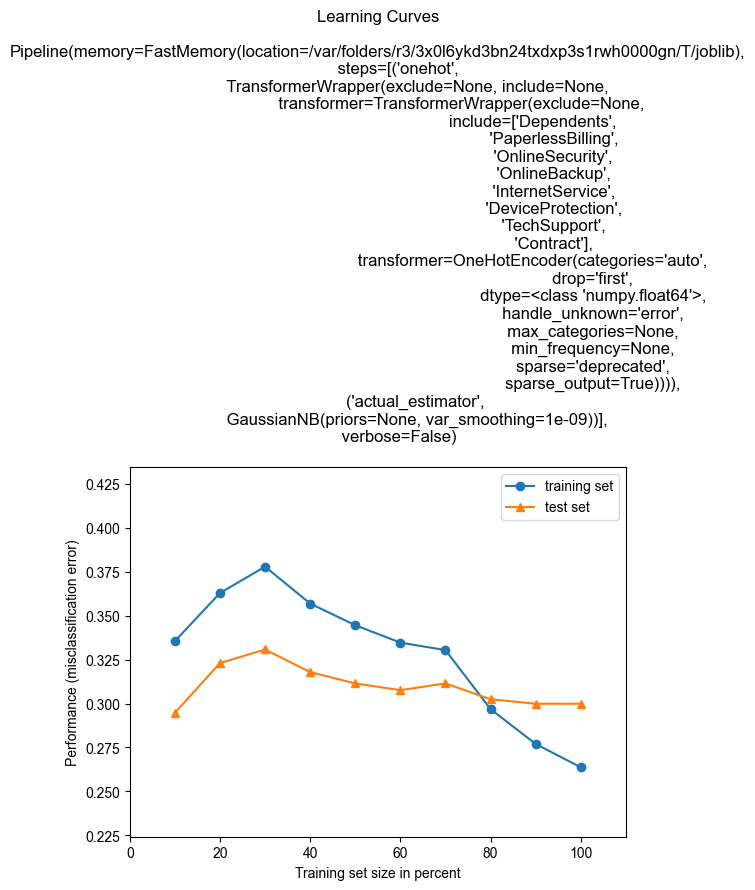

In [279]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


# Loading some example data
X_train= smote.get_config('X_train_transformed')
y_train= smote.get_config('y_train_transformed')
X_test = smote.get_config('X_test_transformed')
y_test= smote.get_config('y_test_transformed')


plot_learning_curves(X_train, y_train, X_test, y_test, final_model)
plt.show()

Best Threshold=0.988635


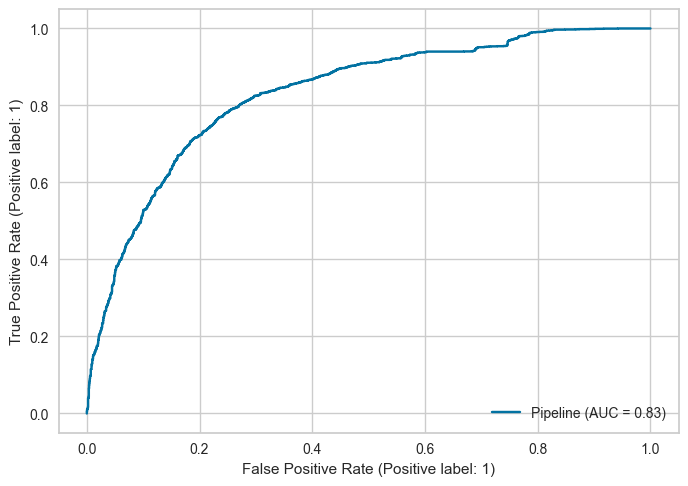

In [281]:
import numpy as np
from sklearn.metrics import roc_curve, RocCurveDisplay

# Perform ROC AUC curve
RocCurveDisplay.from_estimator(final_model, X_train, y_train)

# Get the best threshold
fpr, tpr, thresholds = roc_curve(y_train, final_model.predict_proba(X_train)[:, 1])
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f' % (thresholds[ix]))

In [276]:
nonrobust.deep_check(final_model, check_kwargs={})

deepchecks - WARNING - Features importance was not calculated:
Got error when trying to predict with model on dataset: "['OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes'] not in index"


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_DKZ7S5GCAYABW7DHYVH52KSI0">Full Suite</h1>\n<…